In [1]:
import librosa
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
train_path = '/kaggle/input/audio-cats-and-dogs/cats_dogs/train'
test_path = '/kaggle/input/audio-cats-and-dogs/cats_dogs/test'

In [3]:
classes = ['cat','dog']

In [4]:
audio,sr = librosa.load('/kaggle/input/audio-cats-and-dogs/cats_dogs/train/dog/dog_barking_0.wav',sr=None)

In [5]:
from IPython.display import Audio
Audio(audio,rate=sr)

In [6]:
sr

16000

In [7]:
audio_feature = []
label = []
for folder in classes:
    for audio_path in os.listdir(train_path+"/"+folder):
        audio,sr = librosa.load(train_path+"/"+folder+'/'+ audio_path,sr=22000)
        mfcc = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        audio_feature.append(mfcc_mean)
        label.append(folder)

In [8]:
audio_feature = np.array(audio_feature)

In [9]:
audio_feature.shape

(210, 13)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(label)

In [11]:
label.shape

(210,)

In [12]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(audio_feature,label,random_state=42,test_size=0.2)

In [14]:
xtrain.shape

(168, 13)

In [15]:
ytrain.shape

(168,)

<Axes: ylabel='count'>

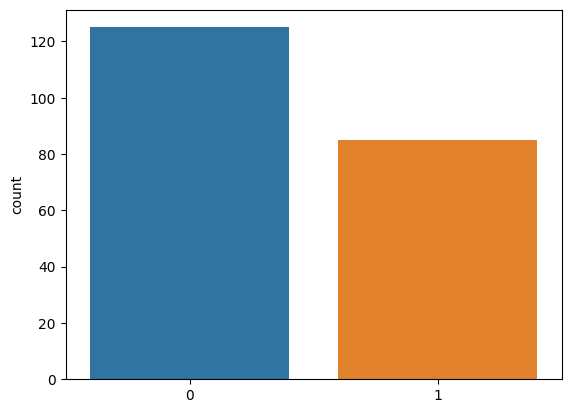

In [16]:
import seaborn as sns
sns.countplot(x=label)

<Axes: ylabel='count'>

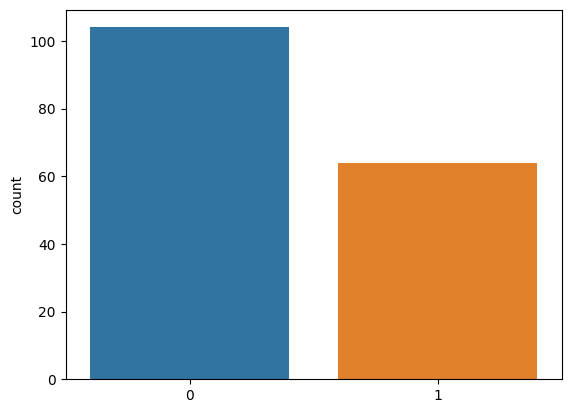

In [17]:
sns.countplot(x=ytrain)

<Axes: ylabel='count'>

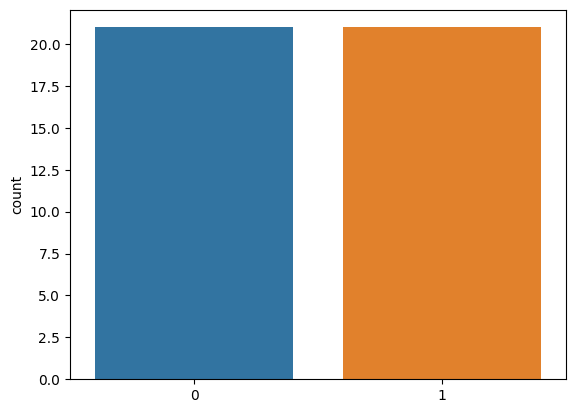

In [18]:
import seaborn as sns
sns.countplot(x=yval)

In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Dense(13,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [22]:
history = model.fit(xtrain,ytrain,validation_data=(xval,yval),batch_size=16,epochs=50)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5042 - loss: 2.0766 - val_accuracy: 0.5238 - val_loss: 1.2020
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5459 - loss: 1.0812 - val_accuracy: 0.6429 - val_loss: 1.1307
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8519 - loss: 0.3423 - val_accuracy: 0.8333 - val_loss: 0.5424
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8625 - loss: 0.4030 - val_accuracy: 0.8571 - val_loss: 0.5170
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8258 - loss: 0.4612 - val_accuracy: 0.8571 - val_loss: 0.5624
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8713 - loss: 0.3621 - val_accuracy: 0.8571 - val_loss: 0.5223
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8414 - loss: 0.3128 - val_accuracy: 0.8571 - val_loss: 0.4910
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8988 - loss: 0.2689 - val_accuracy: 0.8571 - val_loss

<Axes: >

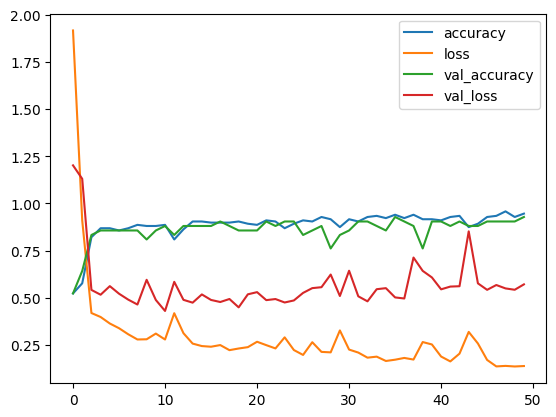

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
test_classes = ['cats','test']
test_audio_feature = []
test_label = []
for folder in test_classes:
    for audio_path in os.listdir(test_path+"/"+folder):
        audio,sr = librosa.load(test_path+"/"+folder+'/'+ audio_path,sr=22000)
        mfcc = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        test_audio_feature.append(mfcc_mean)
        if folder == 'test':    
            test_label.append('dog')
        else:
            test_label.append('cat')

In [25]:
test_label

['cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog']

In [26]:
test_label = le.transform(test_label)

In [27]:
test_audio_feature = np.array(test_audio_feature)

In [28]:
predict = model.predict(test_audio_feature)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
predict[0]

array([0.47921255], dtype=float32)

In [31]:
model.evaluate(test_audio_feature,test_label)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.3976 


[0.4741845428943634, 0.8208954930305481]

In [32]:
predict.reshape(-1).shape

(67,)

In [33]:
test_label.shape

(67,)

In [34]:
from sklearn.svm import SVC

In [35]:
model1 = SVC()

In [36]:
model1.fit(xtrain,ytrain)

SVC()

In [37]:
model1.fit(xval,yval)

SVC()

In [38]:
predictions = model1.predict(test_audio_feature)

In [39]:
accuracy_score(test_label,predictions)

0.8507462686567164